In [1]:
! pip install pylatexenc

In [2]:
import sys,os
sys.path.append(os.path.abspath(".."))

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit import transpile 
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector,plot_bloch_multivector
from qiskit.quantum_info import DensityMatrix, partial_trace, negativity


import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
from QuantumWalkModule.QuantumComputer import *

<h1>Quantum Random Walk on quantum computer</h1>

<h2>Testing shifts</h2>

In [19]:
_0,_1 = [1,0],[0,1]

def get_res(init_tab,**kwargs):
    mode = kwargs.get("mode","left")
    shift = Shift(4)
    qc2 = shift.get_op(mode = mode)
    qc2_ret = qc2
    start = QuantumCircuit(4)
    for i in range(len(init_tab)):
        start.initialize(init_tab[i],i)
    start.barrier()
    qc2 = start.compose(qc2)
    qc2.barrier()
    cr = ClassicalRegister(4,"c")
    qc2.add_register(cr)
    for i in range(4):
        qc2.measure(i,cr[len(cr) - 1 - i])
    sim = AerSimulator()
    qc_com = transpile(qc2,sim)
    res = sim.run(qc_com).result()
    res_ans = res.get_counts()
    return res_ans, qc2_ret

In [20]:
for i in range(16):
    str_init = Shift.DecToBin(i,4)
    init_tab = [_0 if str_init[i] == "0" else _1 for i in range(len(str_init))]
    res_ans, circ = get_res(init_tab)
    print(f"for initial state: {str_init}, result is: {res_ans}")

for initial state: 0000, result is: {'1111': 1024}
for initial state: 0001, result is: {'0000': 1024}
for initial state: 0010, result is: {'0001': 1024}
for initial state: 0011, result is: {'0010': 1024}
for initial state: 0100, result is: {'0011': 1024}
for initial state: 0101, result is: {'0100': 1024}
for initial state: 0110, result is: {'0101': 1024}
for initial state: 0111, result is: {'0110': 1024}
for initial state: 1000, result is: {'0111': 1024}
for initial state: 1001, result is: {'1000': 1024}
for initial state: 1010, result is: {'1001': 1024}
for initial state: 1011, result is: {'1010': 1024}
for initial state: 1100, result is: {'1011': 1024}
for initial state: 1101, result is: {'1100': 1024}
for initial state: 1110, result is: {'1101': 1024}
for initial state: 1111, result is: {'1110': 1024}


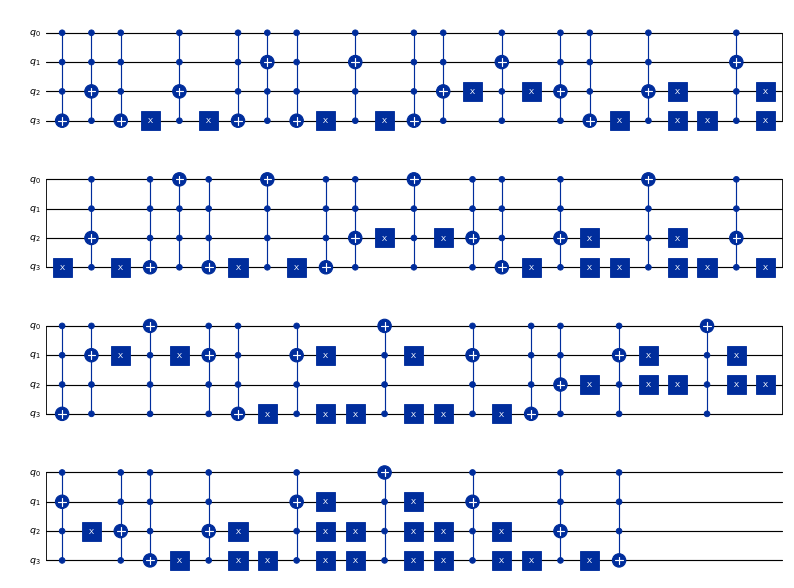

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
circ.draw('mpl', ax = ax)
fig.savefig("Images/shift_circuit.pdf", format = "pdf", bbox_inches = "tight")

In [8]:
for i in range(16):
    str_init = Shift.DecToBin(i,4)
    init_tab = [_0 if str_init[i] == "0" else _1 for i in range(len(str_init))]
    print(f"for initial state: {str_init}, result is: {get_res(init_tab)}")

for initial state: 0000, result is: {'1111': 1024}
for initial state: 0001, result is: {'0000': 1024}
for initial state: 0010, result is: {'0001': 1024}
for initial state: 0011, result is: {'0010': 1024}
for initial state: 0100, result is: {'0011': 1024}
for initial state: 0101, result is: {'0100': 1024}
for initial state: 0110, result is: {'0101': 1024}
for initial state: 0111, result is: {'0110': 1024}
for initial state: 1000, result is: {'0111': 1024}
for initial state: 1001, result is: {'1000': 1024}
for initial state: 1010, result is: {'1001': 1024}
for initial state: 1011, result is: {'1010': 1024}
for initial state: 1100, result is: {'1011': 1024}
for initial state: 1101, result is: {'1100': 1024}
for initial state: 1110, result is: {'1101': 1024}
for initial state: 1111, result is: {'1110': 1024}


<h2>Testing step operator</h2>

In [29]:
theta = np.pi / 4
qubits = 4

model = QuantumWalk(qubits, theta = theta)


In [30]:
for i in range(16):
    str_ = Shift.DecToBin(i,4)
    init_state_tab = [("0"+ str_,1)]
    init_state = op.get_initial_st(*init_state_tab)
    res,circ = model.run(init_state,steps = 1)
    print(f"for initial state: {str_}, result is: {res}")

for initial state: 0000, result is: {'1111': 874, '0001': 150}
for initial state: 0001, result is: {'0010': 142, '0000': 882}
for initial state: 0010, result is: {'0011': 141, '0001': 883}
for initial state: 0011, result is: {'0010': 861, '0100': 163}
for initial state: 0100, result is: {'0101': 148, '0011': 876}
for initial state: 0101, result is: {'0110': 144, '0100': 880}
for initial state: 0110, result is: {'0111': 167, '0101': 857}
for initial state: 0111, result is: {'1000': 143, '0110': 881}
for initial state: 1000, result is: {'1001': 136, '0111': 888}
for initial state: 1001, result is: {'1010': 168, '1000': 856}
for initial state: 1010, result is: {'1011': 141, '1001': 883}
for initial state: 1011, result is: {'1010': 875, '1100': 149}
for initial state: 1100, result is: {'1101': 143, '1011': 881}
for initial state: 1101, result is: {'1110': 159, '1100': 865}
for initial state: 1110, result is: {'1111': 141, '1101': 883}
for initial state: 1111, result is: {'0000': 161, '1110

In [31]:
for i in range(16):
    str_ = Shift.DecToBin(i,4)
    init_state_tab = [("1"+ str_,1)]
    init_state = op.get_initial_st(*init_state_tab)
    res,circ = model.run(init_state,steps = 1)
    print(f"for initial state: {str_}, result is: {res}")

for initial state: 0000, result is: {'1111': 159, '0001': 865}
for initial state: 0001, result is: {'0000': 140, '0010': 884}
for initial state: 0010, result is: {'0001': 161, '0011': 863}
for initial state: 0011, result is: {'0010': 162, '0100': 862}
for initial state: 0100, result is: {'0011': 167, '0101': 857}
for initial state: 0101, result is: {'0100': 153, '0110': 871}
for initial state: 0110, result is: {'0101': 148, '0111': 876}
for initial state: 0111, result is: {'0110': 147, '1000': 877}
for initial state: 1000, result is: {'0111': 157, '1001': 867}
for initial state: 1001, result is: {'1010': 868, '1000': 156}
for initial state: 1010, result is: {'1001': 150, '1011': 874}
for initial state: 1011, result is: {'1010': 144, '1100': 880}
for initial state: 1100, result is: {'1011': 152, '1101': 872}
for initial state: 1101, result is: {'1100': 133, '1110': 891}
for initial state: 1110, result is: {'1101': 150, '1111': 874}
for initial state: 1111, result is: {'1110': 144, '0000

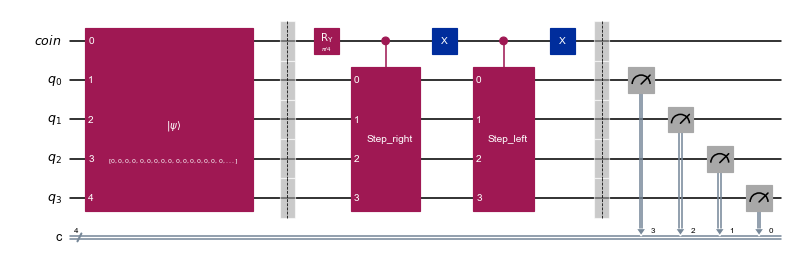

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
circ.draw('mpl',ax=ax)
fig.savefig("Images/QWcirc.pdf", format = "pdf", bbox_inches = "tight")

<h1>Quantum Walk</h1>

In [13]:
init_state_tab = [("110000",1),("010000",1j)]
init_state = op.get_initial_st(*init_state_tab)

In [14]:
theta = np.pi/4
qubits = 5

model = QuantumWalk(qubits, theta = theta)

In [16]:
fig = plt.figure()

res,circ = model.run(init_state,steps = 10)
for i in range(2**qubits):
    str_bin = Shift.DecToBin(i,qubits)
    if str_bin not in res.keys():
        res[str_bin] = 0
plot_histogram(res)

fig.savefig("Images/QCQW.pdf",format= "pdf",bbox_inches = "tight")

<Figure size 640x480 with 0 Axes>

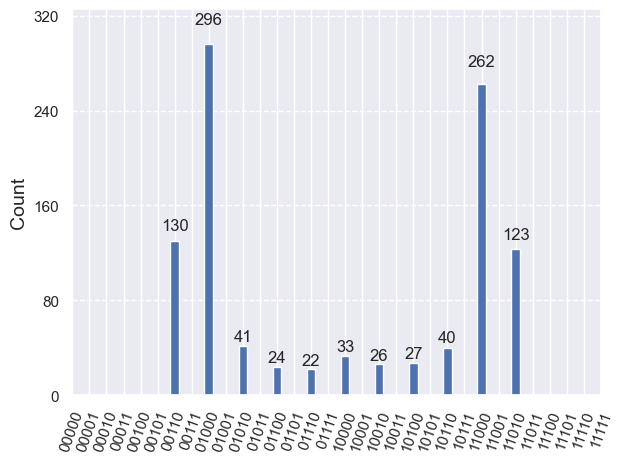

In [26]:
plot_histogram(res)

In [25]:

fig = plot_histogram(res)
print(fig)
fig.savefig("Images/QCQW.pdf",format= "pdf",bbox_inches = "tight")

Figure(640x480)
